In [1]:
import numpy as np
import seaborn as sns
import gym 

In [2]:
%matplotlib inline

In [3]:
env = gym.make('Taxi-v2')
nactions = env.action_space.n 
nstates = env.observation_space.n

[2017-07-03 11:42:23,752] Making new env: Taxi-v2


In [4]:
class EpsilonGreedy:
    def __init__(self, values, epsilon):
        self.qvalues = values
        self.eps = epsilon
        
    def sample(self, state):
        if np.random.uniform() < self.eps :
            return int(np.random.randint(self.qvalues.shape[1]))
        return np.argmax(self.qvalues[state, :])
    
class SoftmaxPolicy:
    def __init__(self, values, temp):
        self.qvalues = values
        self.temp = temp
        
    def pmf(self, state):
        v = self.qvalues[state, :]/self.temp
        expvalues = np.exp(v - np.max(v))
        return expvalues / np.sum(expvalues)

    def sample(self, state):
        return np.random.choice(self.qvalues.shape[1], p=self.pmf(state))

In [5]:
nruns = 10
nsteps = 1000
nepisodes = 1000
gamma = 0.99
exploration = 0.05
learning_rate = 0.25

allruns = []
for run in range(nruns):
    qvalues = np.zeros((nstates, nactions))
    policy = EpsilonGreedy(qvalues, exploration)
    #policy = SoftmaxPolicy(qvalues, exploration)

    learning_curve = []
    for ep in range(nepisodes):
        cumul_reward = 0.
        state = env.reset()
        action = policy.sample(state)

        for step in range(nsteps):
            nextstate, reward, done, _ = env.step(action)
            nextaction = policy.sample(nextstate)

            # TD error
            tderror = reward - qvalues[state, action]
            if not done:
                tderror += gamma*qvalues[nextstate, nextaction]

            # TD update
            qvalues[state, action] += learning_rate*tderror
                
            # SARSA housekeeping
            state, action = nextstate, nextaction
            
            cumul_reward += reward
            if done:
                break
                
        #print("Episode {0} finished after {1} steps, undiscounted return {2}".format(ep, step+1, cumul_reward))    
        learning_curve.append(cumul_reward)
    allruns.append(learning_curve)

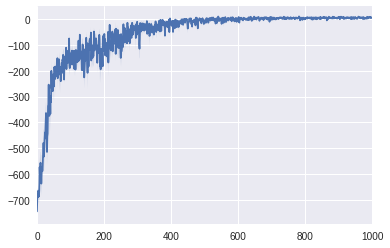

In [6]:
sns.tsplot(allruns)